# Módulo 5 Actividad 9

## Intención del aprendizaje esperado:


***9. Elabora un modelo predictivo aplicando técnicas de Gradient Boosting para resolver un problema de clasificación utilizando lenguaje Python.***

**Ejercicios Planteados**


*Es sabido que, una entidad que presta servicios o productos (pudiera ser una empresa, un banco, una tienda, etcétera) puede mejorar la experiencia de cliente desarrollando productos personalizados en pos de las preferencias y necesidades de cada uno de sus clientes.*

*El set de datos potencial contiene datos sobre clientes de una institución financiera:*


- Customer ID: ID asociado al cliente

- Age: Edad en años del cliente


- Income: Ingreso anual del cliente


- Family: Tamaño del grupo familiar del cliente


- CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito


- Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si posee estudios especializadoss (magister, doctorado, etcétera)


- Mortgage: Monto de la hipoteca (0 indica que no posee)


- ZIP Code: Código postal del domicilio

*En la última campaña a cada cliente se le ofreció un producto personalizado en base a su comportamiento financiero, preferencias, capacidad de pago y necesidades. La variable target corresponde a **Personal Loan** el cual indica si el cliente tomó o no tomó este producto (¿El cliente aceptó o no el producto ofrecido?), donde 0 indica que el cliente no adquirió el producto y 1 indica que sí lo adquirió.*

*Es de interés analizar cuáles pudieran ser los perfiles de clientes que tienen mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar a los clientes con dichas características y priorizarlos a ellos en las próximas campañas.*


***a) Cargue el set de datos utilizando la función read.excel de pandas. ¿Qué columnas le hacen sentido incluir en un modelo para predecir si un cliente tomará o no el producto ofrecido? Si desea eliminar alguna columna, recuerde que puede usar la función drop('nombre columna a eliminar', axis=1).***

In [20]:
import pandas as pd

credito = pd.read_csv('Model_creditoPersonal.csv')
df_credito = pd.DataFrame(credito)

df_credito.head()



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [21]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [22]:
correlacion = df_credito['Personal Loan'].corr(df_credito['ZIP Code'], method='pearson')
print(f'El índice de correlación de Pearson entre la variable target y la variable ZIP Code es {correlacion:.4f}')

El índice de correlación de Pearson entre la variable target y la variable ZIP Code es 0.0001


In [23]:
df_credito = df_credito.drop(columns=['ID', 'ZIP Code'], axis=1)

Se elimina la columna 'ID' ya que no aporta valor estadístico.  Se elimina la columna 'ZIP Code' ya que los valores de sus registros no tiene sentido estandarizarlos, si fuese necesario, en pasos posteriores y el índice de correlación de Pearson (0.0001) demuestra que no existe prácticamente ninguna correlación entre las variables.

*b) Determine cuáles son las variables predictoras que son categorías y obtenga las variables dummies correspondientes para incluirlas en el modelo. Recuerde que puede usar la función get_dummies() de pandas.*

In [26]:
df_credito.apply(pd.unique)

Age                   [25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 5...
Experience            [1, 19, 15, 9, 8, 13, 27, 24, 10, 39, 5, 23, 3...
Income                [49, 34, 11, 100, 45, 29, 72, 22, 81, 180, 105...
Family                                                     [4, 3, 1, 2]
CCAvg                 [1.6, 1.5, 1.0, 2.7, 0.4, 0.3, 0.6, 8.9, 2.4, ...
Education                                                     [1, 2, 3]
Mortgage              [0, 155, 104, 134, 111, 260, 163, 159, 97, 122...
Personal Loan                                                    [0, 1]
Securities Account                                               [1, 0]
CD Account                                                       [0, 1]
Online                                                           [0, 1]
CreditCard                                                       [0, 1]
dtype: object

Si bien el dataset cuenta solo con datos numéricos, las variables categóricas, en este caso, están definidas por las columnas que contienen valores binarios (0 o 1), que tienen significancia booleana.  Estas variables son: 'Personal Loan', 'Securities Account', 'CD Account', 'Online' y 'CreditCard'.  El hecho de que el contenido de las columnas sea binario no hace necesario el uso de 'get.dummies' ya que no aporta valor adicional al proceso de modelado.

*c) Defina en un objeto X las variables predictoras y en Y la variable respuesta **Personal Loan**. Obtenga los set de entrenamiento y prueba en una proporción 5:1. Recuerde que la función train_test_split() es útil para realizar split simple, además fije una semilla 2021 (random_state=2021 en la función train_test_split()).*

In [34]:
from sklearn.model_selection import train_test_split

X = df_credito.drop('Personal Loan', axis=1)
y = df_credito['Personal Loan']

proporcion = 1/6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=proporcion, random_state=2021)


*d) Obtenga un árbol de decisión con el set de datos de entrenamiento.*

*Obtenga el MSE del modelo en el set de prueba.*

*Muestre el árbol obtenido, ¿qué observa? ¿cuáles podrían ser los problemas de este árbol? ¿qué alternativas pudieran probarse para abordar este problema?*

In [62]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

modelo_clasificacion_arbol_de_decision = DecisionTreeClassifier(random_state=2021)
modelo_clasificacion_arbol_de_decision.fit(X_train, y_train)


DecisionTreeClassifier(random_state=2021)

In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = modelo_clasificacion_arbol_de_decision.predict(X_test)
mse_modelo_clasificacion_arbol_de_decision = mean_squared_error(y_test, y_pred)

print(' Predicciones '.center(40, '=') + '\n')
print(np.array(y_pred[:10]))

print('\n' + ' Valores Reales '.center(40, '=') + '\n')
print(np.array(y_test[:10]))
print('\n' + '=' * 40)

print('\n' + 'MSE MODELO CLASIFICACIÓN '.ljust(30,'.') + f' {mse_modelo_clasificacion_arbol_de_decision:.4f}'.rjust(10, '.'))


============= Predicciones =============

[0 0 0 0 1 0 0 0 0 0]

============ Valores Reales ============

[0 0 0 0 1 0 0 0 1 0]


MSE MODELO CLASIFICACIÓN ........ 0.0204


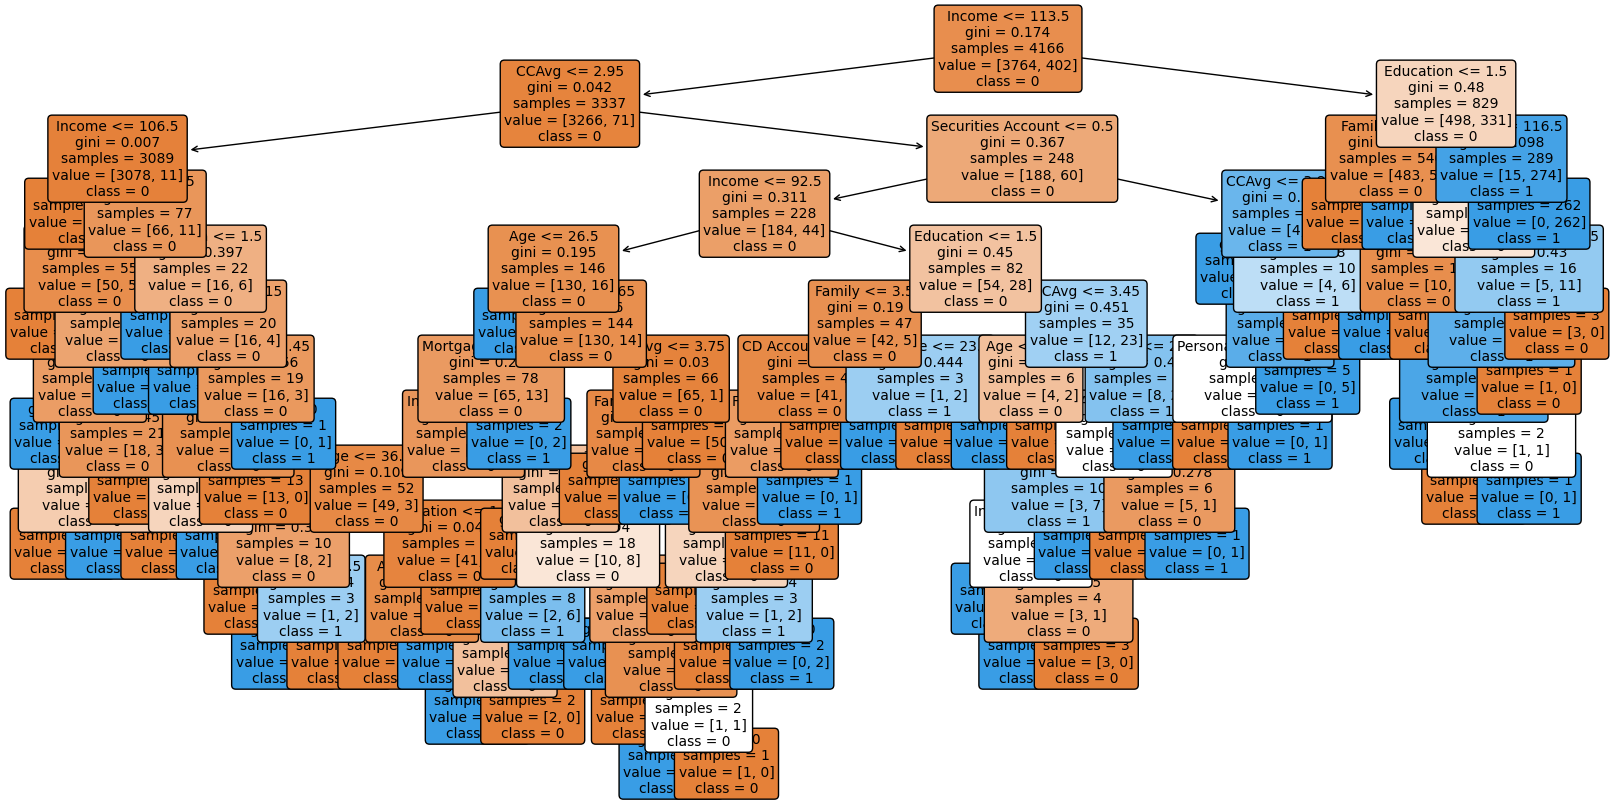

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(modelo_clasificacion_arbol_de_decision, filled=True, feature_names=df_credito.columns[:-1], class_names=['0', '1'], rounded=True, fontsize=10)
plt.show()


El modelo de clasificación, basado en la métrica de error MSE, resulta bastante afinado, sin embargo al graficar el resultado se muestra bastante complejo de entender.  Desde mi punto de vista, las solución a la gráfica puede resolverse indicando una menor profundidad del árbol como también un nuevo análisis de las variables que fueron consideradas con el objetivo de eliminar algunas de ellas que pudiesen tener menor influencia en el problema planteado.

*e) Plantee otro árbol de decisión pero definiendo como parámetro de control o prepoda la profundidad máxima del árbol, para esto en la función DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad máxima 2). Obtenga el MSE en el set de prueba y compare con el modelo anterior. Observe el árbol obtenido. Comente.*

In [70]:

modelo_clasificacion_arbol_de_decision_2 = DecisionTreeClassifier(max_depth=2, random_state=2021)
modelo_clasificacion_arbol_de_decision_2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=2021)

============= Predicciones =============

[0 0 0 0 1 0 0 0 0 0]

============ Valores Reales ============

[0 0 0 0 1 0 0 0 1 0]


MSE MODELO CLASIFICACIÓN ........ 0.0324


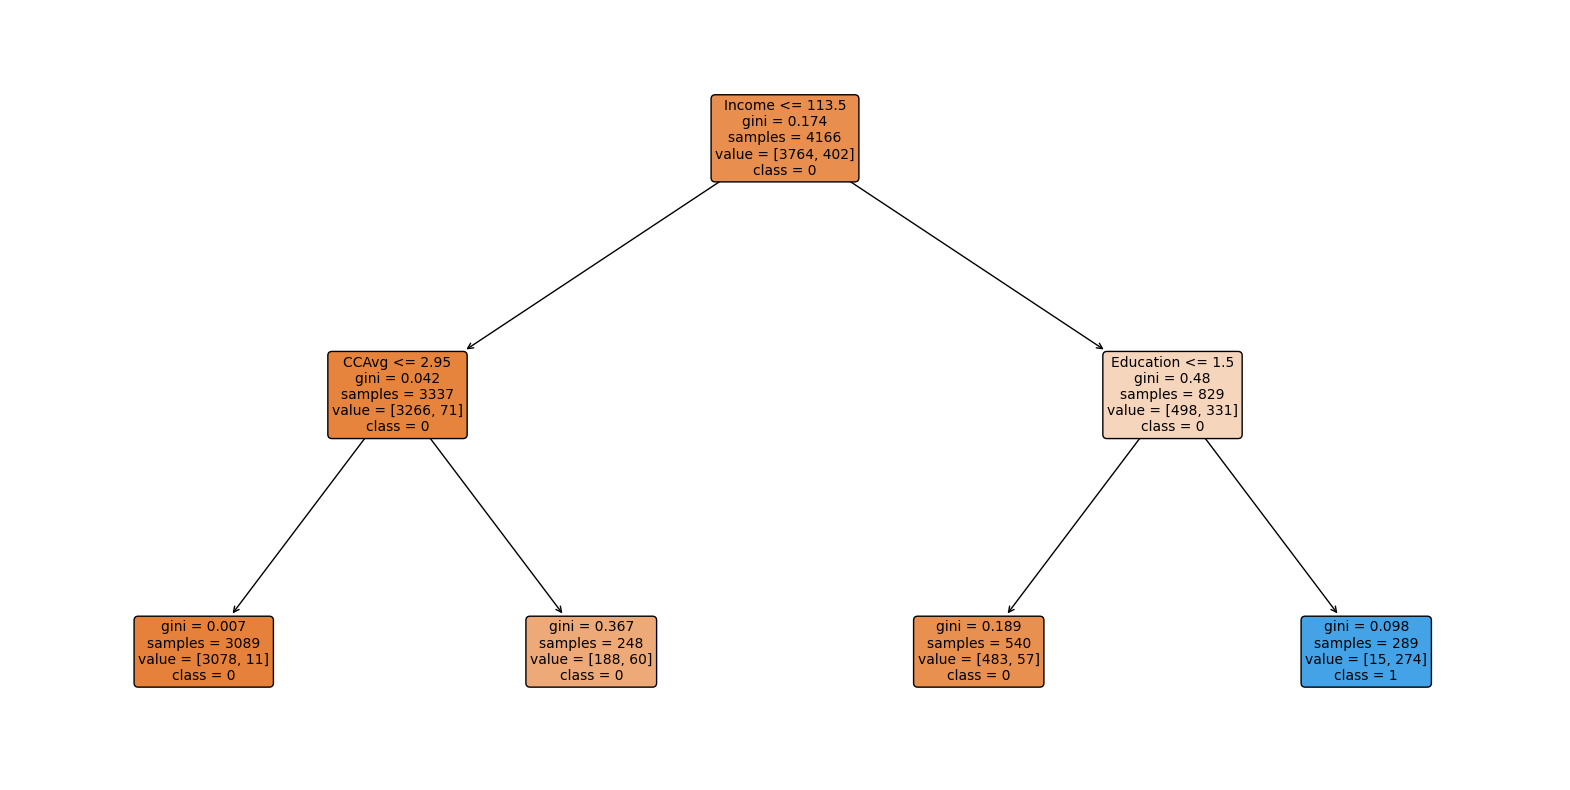

In [71]:
y_pred_2 = modelo_clasificacion_arbol_de_decision_2.predict(X_test)
mse_modelo_clasificacion_arbol_de_decision_2 = mean_squared_error(y_test, y_pred_2)

print(' Predicciones '.center(40, '=') + '\n')
print(np.array(y_pred_2[:10]))

print('\n' + ' Valores Reales '.center(40, '=') + '\n')
print(np.array(y_test[:10]))
print('\n' + '=' * 40)

print('\n' + 'MSE MODELO CLASIFICACIÓN '.ljust(30,'.') + f' {mse_modelo_clasificacion_arbol_de_decision_2:.4f}'.rjust(10, '.'))

plt.figure(figsize=(20, 10))
plot_tree(modelo_clasificacion_arbol_de_decision_2, filled=True, feature_names=df_credito.columns[:-1], class_names=['0', '1'], rounded=True, fontsize=10)
plt.show()


*f) Busque los mejores valores de los criterios de corte y máxima profundidad para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint: evalue los hiperparámetros criterion y max_depth)*

In [106]:
from sklearn.model_selection import GridSearchCV

modelo_arbol_validaciones = DecisionTreeClassifier(random_state=2021)

parametros = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 7, 9]}

grid_search = GridSearchCV(estimator=modelo_arbol_validaciones, param_grid=parametros, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

resultados = pd.DataFrame(grid_search.cv_results_)
mejores_parametros = grid_search.best_params_

print(' MEJORES HIPERPARÁMETROS '.center(40, '=') + '\n')
print('CRITERIO '.ljust(25, '.') + f' {mejores_parametros["criterion"]}'.rjust(15, '.') + '\n\n' + 'PROFUNDIDAD '.ljust(25, '.') + f' {mejores_parametros["max_depth"]}'.rjust(15, '.'))
print('\n' + '=' * 40)


print('\n' + ' MSE por Combinación de Hiperparámetros  '.center(68, '=') + '\n')
print(resultados[['param_criterion', 'param_max_depth', 'mean_test_score', 'mean_train_score']])
print('\n' +  '=' * 68)


======= MEJORES HIPERPARÁMETROS ========

CRITERIO .......................... gini

PROFUNDIDAD .......................... 5


============= MSE por Combinación de Hiperparámetros  ==============

  param_criterion param_max_depth  mean_test_score  mean_train_score
0            gini               1        -0.096495         -0.096495
1            gini               3        -0.019685         -0.018270
2            gini               5        -0.015123         -0.010535
3            gini               7        -0.015605         -0.006241
4            gini               9        -0.018005         -0.003414
5         entropy               1        -0.096495         -0.096495
6         entropy               3        -0.022324         -0.022724
7         entropy               5        -0.017766         -0.012482
8         entropy               7        -0.018005         -0.008428
9         entropy               9        -0.018006         -0.004347

